In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/XGdata.csv')

In [4]:
df

,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,avg_p_6,sum_p_6,count_p_7,avg_p_8,sum_p_8,count_p_8,avg_p_9,sum_p_9,count_p_9,count_p_10,count_p_11,count_p_12,avg_p_13,count_p_13,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,first_p_18,...,c_45,c_25,c_2,c_65,c_1,c_12,c_31,c_28,c_29,c_67,c_21,c_71,ms_1,ms_6,ms_0,ms_8,ms_3,ms_7,ms_2,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10,y_pred
0,14.000000,14.000000,14.000000,14.000000,14.000000,60.000000,1,0.00,0.0,10.0,10,1,5.00000,5.000000,1,0.000000,0.000000,1,0,1,9,0.0,0,0.0,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.147286,0.252286,0.437286,0.437286,0.532286,60.440000,25,0.60,0.4,10.0,250,25,0.06400,1.600000,25,0.022400,0.560000,25,0,11,60,16.0,1,16.0,1,38,2107,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.005000,0.005000,0.005000,0.005000,0.005000,10.000000,1,1.00,1.0,10.0,10,1,0.05000,0.050000,1,0.010000,0.010000,1,0,0,1,0.0,0,0.0,0,3,115,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.319261,50.620786,62.150415,62.934954,64.623987,56.212525,345,0.50,0.5,10.0,3450,345,0.46971,162.050001,345,0.152870,52.740009,345,2,5,35,91.5,2,183.0,2,99,4,0,87,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.010274,0.010274,0.010274,0.010274,0.010274,73.453749,2,0.50,0.0,5.0,10,0,0.05000,0.100000,2,0.000000,0.000000,2,0,1,4,0.0,0,0.0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58453,0.048704,0.048704,0.048704,0.048704,0.048704,43.664427,3,0.00,0.0,10.0,30,3,0.05000,0.150000,3,0.000000,0.000000,3,0,1,2,0.0,0,0.0,0,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58454,0.046296,0.046296,0.046296,0.046296,0.046296,42.203248,1,0.00,0.0,5.0,5,0,0.05000,0.050000,1,0.000000,0.000000,1,0,1,2,0.0,0,0.0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58455,0.050000,0.050000,0.050000,0.050000,0.050000,82.000000,1,0.00,0.0,10.0,10,1,0.05000,0.050000,1,0.000000,0.000000,1,0,1,5,0.0,0,0.0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58456,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0,0.00,0.0,0.0,0,0,0.00000,0.000000,0,0.000000,0.000000,0,0,0,4,0.0,0,0.0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df = df[df.y_pred != 0]
df = df.drop(columns = ['y_pred'])
df

,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,avg_p_6,sum_p_6,count_p_7,avg_p_8,sum_p_8,count_p_8,avg_p_9,sum_p_9,count_p_9,count_p_10,count_p_11,count_p_12,avg_p_13,count_p_13,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,first_p_18,...,c_15,c_45,c_25,c_2,c_65,c_1,c_12,c_31,c_28,c_29,c_67,c_21,c_71,ms_1,ms_6,ms_0,ms_8,ms_3,ms_7,ms_2,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10
10,0.000000,0.000000,0.000000,0.000000,0.249807,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,0,0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0.000000,0.000000,0.000000,0.000000,0.041988,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,0,0,1,0.0,0,0.0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,6.286699,65.836577,81.402988,89.622620,89.622620,0.000000,0,0.5,0.5,5.000000,3505,0,0.184379,129.25,701,0.125078,87.680006,701,22,22,58,30.0,3,90.0,0,143,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,0.000000,0.000000,0.000000,0.000000,0.068611,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,0,0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
85,0.000000,0.000000,0.000000,0.000000,21.389712,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58413,0.114208,0.114208,0.114208,0.114208,6.732978,57.347674,5,0.5,0.5,10.000000,50,5,0.050000,0.25,5,0.004000,0.020000,5,0,1,0,0.0,0,0.0,0,7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58418,0.212857,0.212857,3.484535,3.484535,1630.339658,62.668354,16,0.5,0.5,8.035714,135,0,0.153125,2.45,16,0.058750,0.940000,16,8,8,6,0.0,0,0.0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
58425,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,21,7,12,0.0,0,0.0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58433,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0,0.0,0.0,0.000000,0,0,0.000000,0.00,0,0.000000,0.000000,0,0,0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= df.drop("d30_spend",axis=1).values
y= df[["d30_spend"]].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [8]:
from sklearn.metrics import r2_score 
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_lasso

0.765308008756803

In [9]:
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

10190279.306962244

In [10]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

3192.221688254474

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [13]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1030.9877158982017
MSE: 8868017.903522266
RMSE: 2977.9217423435202
R2 Square 0.7957609681281258
__________________________________
Train set evaluation:
_____________________________________
MAE: 1095.2990464259854
MSE: 19220559.623655237
RMSE: 4384.125867679352
R2 Square 0.7769642980683938
__________________________________


In [14]:
# show the coe 
names = df.drop("d30_spend",axis=1).columns
coef = pd.Series(lasso.coef_, index = names).sort_values()

In [15]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 74 variables and eliminated the other 33 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

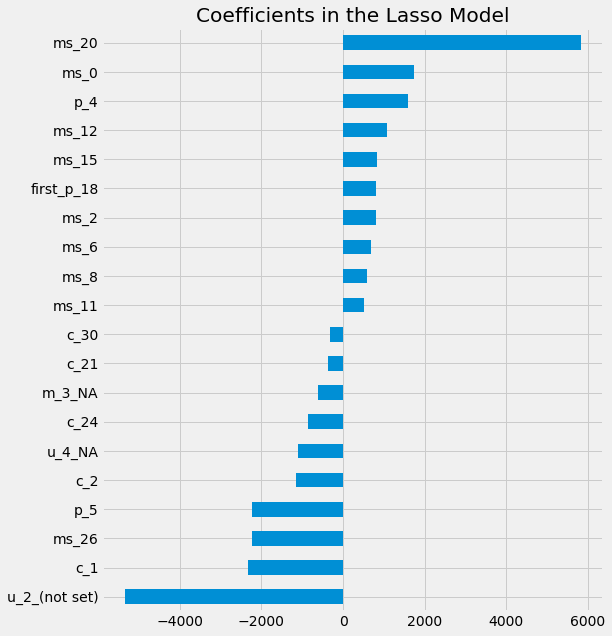

In [16]:
import matplotlib.pyplot as plt
import matplotlib
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

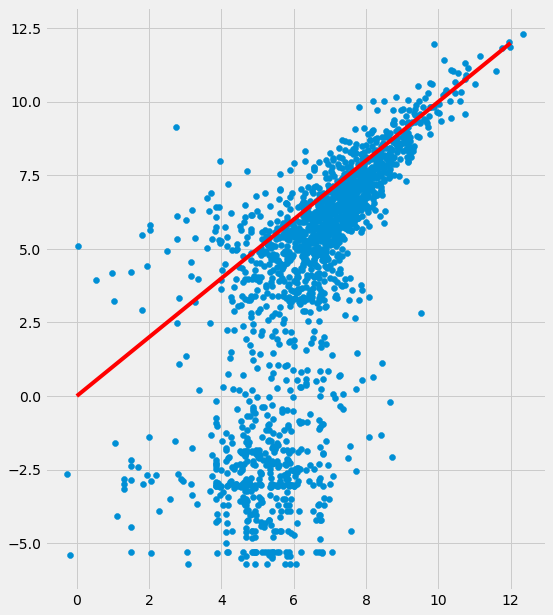

In [17]:
p_pred = np.log(lasso.predict(X_train))
plt.scatter(p_pred, np.log(y_train))
#plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="green")
ident = [0.0, 12.0]
plt.plot(ident,ident,c="red")